In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df_pop_ny = pd.read_excel("drive/MyDrive/Colab data/co-est2022-pop-36.xlsx")
df_pop_ny = df_pop_ny.rename(columns={"table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)": "county",
                          "Unnamed: 1": "Ignore",
                          "Unnamed: 2": "2020",
                          "Unnamed: 3": "2021",
                          "Unnamed: 4": "2022"})
df_pop_ny = df_pop_ny.drop(columns=['Ignore'])
df_pop_ny = df_pop_ny.iloc[4:]
df_pop_ny = df_pop_ny.iloc[:62]
df_pop_ny = df_pop_ny.reset_index(drop=True)
df_pop_ny['county'] = df_pop_ny['county'].str.replace('County,', '')
df_pop_ny['county'] = df_pop_ny['county'].str.replace('.', '')
df_pop_ny['county'] = df_pop_ny['county'].str.replace('New York', '')
df_pop_ny['county'] = df_pop_ny['county'].str.replace(' ', '')

<ipython-input-65-bc7fa8fedf81>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pop_ny['county'] = df_pop_ny['county'].str.replace('.', '')


In [ ]:
df = pd.read_csv("drive/MyDrive/Colab data/us-counties-2021.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_ny = df[df["state"]=="New York"]
df_ny = pd.merge(df_ny, df_pop_ny, on = 'county')

In [ ]:
df_ny.isnull().sum()
df_ny

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,2020,2021,2022
0,2021-01-01,USA-36123,Yates,New York,21,13.00,52.18,1,0.13,0.50,24720,24634.0,24451.0
1,2021-01-02,USA-36123,Yates,New York,17,13.14,52.76,0,0.13,0.50,24720,24634.0,24451.0
2,2021-01-03,USA-36123,Yates,New York,18,15.29,61.36,0,0.13,0.50,24720,24634.0,24451.0
3,2021-01-04,USA-36123,Yates,New York,15,15.71,63.08,2,0.17,0.69,24720,24634.0,24451.0
4,2021-01-05,USA-36123,Yates,New York,11,15.71,63.08,0,0.17,0.69,24720,24634.0,24451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20435,2021-12-27,USA-36001,Albany,New York,118,225.00,73.65,0,0.94,0.31,313987,316301.0,315811.0
20436,2021-12-28,USA-36001,Albany,New York,216,230.00,75.28,0,0.94,0.31,313987,316301.0,315811.0
20437,2021-12-29,USA-36001,Albany,New York,444,260.29,85.20,1,0.90,0.29,313987,316301.0,315811.0
20438,2021-12-30,USA-36001,Albany,New York,496,291.57,95.44,0,0.90,0.29,313987,316301.0,315811.0


In [ ]:
df_ny['date'] = df_ny['date'].str.slice(5, 7)
df_ny["date"].min()
df_ny["date"] = df_ny["date"].astype(int)

In [ ]:
df_ny_gp = df_ny.groupby(["county","date"])["cases"].sum().to_frame().reset_index()
df_ny_gp = pd.merge(df_ny_gp, df_ny[["county","2021"]], on = ['county'])
df_ny_gp = df_ny_gp.drop_duplicates()
df_ny_gp["p"] = df_ny_gp["cases"]/df_ny_gp["2021"]
df_ny_gp

,county,date,cases,2021,p
0,Albany,1,7116,316301.0,0.022498
365,Albany,2,2147,316301.0,0.006788
730,Albany,3,1765,316301.0,0.005580
1095,Albany,4,1515,316301.0,0.004790
1460,Albany,5,505,316301.0,0.001597
...,...,...,...,...,...
243455,Yates,8,68,24634.0,0.002760
243820,Yates,9,188,24634.0,0.007632
244185,Yates,10,278,24634.0,0.011285
244550,Yates,11,269,24634.0,0.010920


In [ ]:

df_nydem1 = pd.read_csv("drive/MyDrive/Colab data/covid_surveillance_ny.csv")
df_nydem = df_nydem1.copy()
df_nydem = df_nydem.rename(columns={"res_county": "county"})
df_nydem['county'] = df_nydem['county'].str.lower()
df_nydem = df_nydem.drop(columns=['res_state',"state_fips_code",
                                  "county_fips_code","case_positive_specimen_interval",
                                  "hosp_yn",	"icu_yn",	"death_yn"])
df_nydem = df_nydem.drop_duplicates()
print(df_nydem.isnull().sum()/len(df_nydem)*100)
df_nydem

case_month                   0.000000
county                       0.961575
age_group                    1.467289
sex                          3.359598
race                        19.296986
ethnicity                   24.946873
case_onset_interval         59.817909
process                      0.000000
exposure_yn                  0.000000
current_status               0.000000
symptom_status               0.000000
underlying_conditions_yn    76.566045
dtype: float64


,case_month,county,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,underlying_conditions_yn
0,2021-11,albany,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,NaN
1,2022-04,niagara,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,NaN
2,2022-07,dutchess,65+ years,Female,Unknown,Unknown,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,NaN
3,2021-12,queens,65+ years,Male,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,NaN
4,2021-12,new york,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7064880,2020-04,nassau,50 to 64 years,Male,Black,Non-Hispanic/Latino,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes
7065267,2021-09,broome,0 - 17 years,Male,Unknown,Unknown,NaN,Missing,Missing,Laboratory-confirmed case,Missing,NaN
7065351,2022-01,bronx,65+ years,Male,White,Non-Hispanic/Latino,0.0,Missing,Missing,Probable Case,Symptomatic,Yes
7065369,2020-11,orange,18 to 49 years,Female,NaN,NaN,NaN,Missing,Yes,Laboratory-confirmed case,Symptomatic,NaN


In [ ]:
# df_nydem["symptom_status"].value_counts()
cols = ["age_group","sex","exposure_yn","symptom_status","county", "case_month"]
df_nydem = df_nydem[cols]
df_nydem

,age_group,sex,exposure_yn,symptom_status,county,case_month
0,50 to 64 years,Male,Missing,Symptomatic,albany,2021-11
1,18 to 49 years,Female,Missing,Symptomatic,niagara,2022-04
2,65+ years,Female,Missing,Symptomatic,dutchess,2022-07
3,65+ years,Male,Missing,Unknown,queens,2021-12
4,18 to 49 years,Female,Missing,Unknown,new york,2021-12
...,...,...,...,...,...,...
7064880,50 to 64 years,Male,Missing,Missing,nassau,2020-04
7065267,0 - 17 years,Male,Missing,Missing,broome,2021-09
7065351,65+ years,Male,Missing,Symptomatic,bronx,2022-01
7065369,18 to 49 years,Female,Yes,Symptomatic,orange,2020-11


In [ ]:
a = len(df_nydem)
print(a)
df_nydem = df_nydem.dropna(subset=cols)
b = len(df_nydem)
print(b)
print((b/a)*100)
df_nydem['case_month'] = df_nydem['case_month'].str.slice(5, 7)
df_nydem['case_month'] = df_nydem['case_month'].astype(int)
df_nydem['case_month'] = pd.to_numeric(df_nydem['case_month'])
df_nydem = df_nydem.rename(columns={"case_month": "month"})


236695
227029
95.91626354591352


<ipython-input-74-1c5618410487>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nydem['case_month'] = df_nydem['case_month'].str.slice(5, 7)
<ipython-input-74-1c5618410487>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nydem['case_month'] = df_nydem['case_month'].astype(int)
<ipython-input-74-1c5618410487>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
df_ny_gp = df_ny_gp.rename(columns={"date": "month","2021":"pop_density"})
df_ny_gp = df_ny_gp[["month","pop_density","county","p"]]
df_ny_gp["county"] = df_ny_gp["county"].str.lower()
df_nydem = df_nydem[(df_nydem["age_group"]!="Missing")&
                    (df_nydem["sex"]!="Unknown") &
                    (df_nydem["sex"]!="Missing") &
                    (df_nydem["symptom_status"]!="Missing")]


In [ ]:
df_ny_gp.max()

month                 12
pop_density    1533118.0
county             yates
p               0.049252
dtype: object

In [ ]:
print(df_ny_gp[df_ny_gp['p'] == 0.049252]['county'])

Series([], Name: county, dtype: object)


In [ ]:
df_nydem.loc[df_nydem['exposure_yn'] == 'Missing', 'exposure_yn'] = 'Unknown'
df_nydem

,age_group,sex,exposure_yn,symptom_status,county,month
0,50 to 64 years,Male,Unknown,Symptomatic,albany,11
1,18 to 49 years,Female,Unknown,Symptomatic,niagara,4
2,65+ years,Female,Unknown,Symptomatic,dutchess,7
3,65+ years,Male,Unknown,Unknown,queens,12
4,18 to 49 years,Female,Unknown,Unknown,new york,12
...,...,...,...,...,...,...
7064868,65+ years,Female,Unknown,Symptomatic,broome,12
7064878,18 to 49 years,Male,Unknown,Asymptomatic,richmond,1
7065351,65+ years,Male,Unknown,Symptomatic,bronx,1
7065369,18 to 49 years,Female,Yes,Symptomatic,orange,11


In [ ]:
df_ny_encoded = pd.get_dummies(df_nydem, columns=['age_group', 'sex',"exposure_yn","symptom_status"])
df_ny_encoded

,county,month,age_group_0 - 17 years,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,sex_Female,sex_Male,exposure_yn_Unknown,exposure_yn_Yes,symptom_status_Asymptomatic,symptom_status_Symptomatic,symptom_status_Unknown
0,albany,11,0,0,1,0,0,1,1,0,0,1,0
1,niagara,4,0,1,0,0,1,0,1,0,0,1,0
2,dutchess,7,0,0,0,1,1,0,1,0,0,1,0
3,queens,12,0,0,0,1,0,1,1,0,0,0,1
4,new york,12,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064868,broome,12,0,0,0,1,1,0,1,0,0,1,0
7064878,richmond,1,0,1,0,0,0,1,1,0,1,0,0
7065351,bronx,1,0,0,0,1,0,1,1,0,0,1,0
7065369,orange,11,0,1,0,0,1,0,0,1,0,1,0


In [ ]:
print(df_ny_encoded.columns)
other_cols = ['age_group_0 - 17 years',
       'age_group_18 to 49 years', 'age_group_50 to 64 years',
       'age_group_65+ years', 'sex_Female', 'sex_Male', 'exposure_yn_Unknown',
       'exposure_yn_Yes', 'symptom_status_Asymptomatic',
       'symptom_status_Symptomatic', 'symptom_status_Unknown']

Index(['county', 'month', 'age_group_0 - 17 years', 'age_group_18 to 49 years',
       'age_group_50 to 64 years', 'age_group_65+ years', 'sex_Female',
       'sex_Male', 'exposure_yn_Unknown', 'exposure_yn_Yes',
       'symptom_status_Asymptomatic', 'symptom_status_Symptomatic',
       'symptom_status_Unknown'],
      dtype='object')


In [ ]:
df_grouped = df_ny_encoded.groupby(["county","month"])[other_cols].mean()
df_grouped



age_group_0 - 17 years  age_group_18 to 49 years  \
county month                                                     
albany 1                    0.256757                  0.391892   
       2                    0.219512                  0.451220   
       3                    0.109244                  0.470588   
       4                    0.160494                  0.395062   
       5                    0.125000                  0.500000   
...                              ...                       ...   
yates  8                    0.000000                  0.500000   
       9                    0.428571                  0.428571   
       10                   0.230769                  0.461538   
       11                   0.222222                  0.333333   
       12                   0.166667                  0.416667   

              age_group_50 to 64 years  age_group_65+ years  sex_Female  \
county month                                                              
albany 1                      0.209459             0.141892    0.554054   
       2                      0.195122             0.134146    0.536585   
       3                      0.243697             0.176471    0.529412   
       4                      0.246914             0.197531    0.530864   
       5                      0.200000             0.175000    0.525000   
...                                ...                  ...         ...   
yates  8                      0.500000             0.000000    0.500000   
       9                      0.000000             0.142857    0.571429   
       10                     0.230769             0.076923    0.538462   
       11                     0.222222             0.222222    0.555556   
       12                     0.333333             0.083333    0.583333   

              sex_Male  exposure_yn_Unknown  exposure_yn_Yes  \
county month                                                   
albany 1      0.445946             1.000000         0.000000   
       2      0.463415             1.000000         0.000000   
       3      0.470588             0.823529         0.176471   
       4      0.469136             0.839506         0.160494   
       5      0.475000             0.837500         0.162500   
...                ...                  ...              ...   
yates  8      0.500000             1.000000         0.000000   
       9      0.428571             1.000000         0.000000   
       10     0.461538             1.000000         0.000000   
       11     0.444444             1.000000         0.000000   
       12     0.416667             1.000000         0.000000   

              symptom_status_Asymptomatic  symptom_status_Symptomatic  \
county month                                                            
albany 1                              0.0                         1.0   
       2                              0.0                         1.0   
       3                              0.0                         1.0   
       4                              0.0                         1.0   
       5                              0.0                         1.0   
...                                   ...                         ...   
yates  8                              0.0                         1.0   
       9                              0.0                         1.0   
       10                             0.0                         1.0   
       11                             0.0                         1.0   
       12                             0.0                         1.0   

              symptom_status_Unknown  
county month                          
albany 1                         0.0  
       2                         0.0  
       3                         0.0  
       4                         0.0  
       5                         0.0  
...                              ...  
yates  8                         0.0  
       9                         0.0  
      

In [ ]:
df_to_merge = df_grouped.reset_index()
df_merged = pd.merge(df_to_merge, df_ny_gp, on = ['county',"month"])

In [ ]:
df_merged

In [ ]:
df_merged['p'].max()

0.049251965334207455

In [ ]:
# Check unique prevalence values
#  df_ny_gp['p'].unique()


# Display summary statistics
summary_statistics = df_merged['p'].describe()
print("Summary statistics for prevalence:", summary_statistics)

# Check if any prevalence values are close to 0.04
close_values = df_merged[df_merged['p'].between(0.048, 0.05)]['county']
print("Counties close:", close_values)


Summary statistics for prevalence: count    635.000000
mean       0.009565
std        0.008129
min        0.000134
25%        0.003676
50%        0.007053
75%        0.013860
max        0.049252
Name: p, dtype: float64
Counties close: 321    nassau
Name: county, dtype: object


In [ ]:
df_nassau = df_merged[(df_merged["county"]=='nassau')]
print(df_nassau["month"].values)
print(df_nassau["p"].values)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0.02935134 0.01392771 0.01397946 0.00921277 0.00202859 0.0005643
 0.00238802 0.00803602 0.00771613 0.00506861 0.00709432 0.04925197]


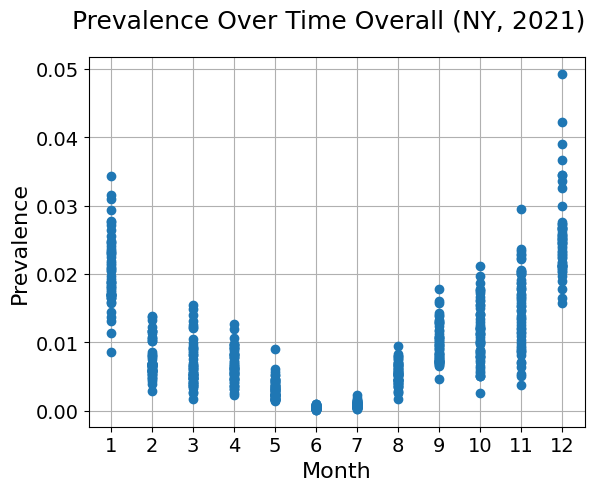

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_merged["month"].values, df_merged["p"].values, marker='o', linestyle='')
plt.xticks(range(1, 13))  # Ensure ticks for all months from 1 to 12
plt.grid(True)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.suptitle('Prevalence Over Time Overall (NY, 2021)', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Prevalence', fontsize=16)
plt.show()

In [ ]:
print(df_merged.isnull().sum()/len(df_merged)*100)


county                         0.0
month                          0.0
age_group_0 - 17 years         0.0
age_group_18 to 49 years       0.0
age_group_50 to 64 years       0.0
age_group_65+ years            0.0
sex_Female                     0.0
sex_Male                       0.0
exposure_yn_Unknown            0.0
exposure_yn_Yes                0.0
symptom_status_Asymptomatic    0.0
symptom_status_Symptomatic     0.0
symptom_status_Unknown         0.0
pop_density                    0.0
p                              0.0
dtype: float64


In [ ]:
county_dict = {county: number for number, county in enumerate(df_merged["county"].unique(), start=1)}
df_merged['county'] = df_merged['county'].replace(county_dict)
df_merged.head(10)
df_merged[(df_merged["month"]==4)& (df_merged["county"]==1)]

,county,month,age_group_0 - 17 years,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,sex_Female,sex_Male,exposure_yn_Unknown,exposure_yn_Yes,symptom_status_Asymptomatic,symptom_status_Symptomatic,symptom_status_Unknown,pop_density,p
3,1,4,0.160494,0.395062,0.246914,0.197531,0.530864,0.469136,0.839506,0.160494,0.0,1.0,0.0,316301.0,0.00479


#Notes:
1. Do we include case_onset_interval column or not? Yes (but use PCA)
2. Need to use underlying_conditions_yn    

##Linear Regression

In [ ]:
df_merged.columns[2:6]

Index(['age_group_0 - 17 years', 'age_group_18 to 49 years',
       'age_group_50 to 64 years', 'age_group_65+ years'],
      dtype='object')

In [ ]:
#Linear Regression:
maxnum =0.0
current = 0.0;
optimal = 0.0;
X = np.array(df_merged["age_group_0 - 17 years", "age_group_18 to 49 years"])
y = np.array(df_merged["p"])
scores = []

# for i in range(10,31):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100.0,random_state = 10)
#     regr = LinearRegression()
#     regr.fit(X_train, y_train)
#     current = regr.score(X_test, y_test)
#     if current>maxnum:
#       maxnum = current
#       optimal = i;
#     scores.append(regr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 10)
regr = LinearRegression()
regr.fit(X_train, y_train)
#.05 size
regr = LinearRegression()
regr.fit(X_train, y_train)
print("score: " +regr.score(X_test, y_test))

# print(maxnum)
# print("test size " + str(optimal/100))



In [ ]:
x_axis = np.arange(10,31)
plt.plot(x_axis, scores, marker='o', linestyle='')
plt.title('Regressor Scores vs test_size')
plt.xlabel('Test Size')
plt.ylabel('Regressor scores')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 10)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
#Evaluate:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

In [ ]:
#geenrate input is a vector of prevalence and number of people
#geenrate a random sample of 50 people, 35 will have it
#35 will be on, rest will be off

##Random Forest

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import confusion_matrix

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
df_ny_gp

,month,pop_density,county,p
0,1,316301.0,albany,0.022498
365,2,316301.0,albany,0.006788
730,3,316301.0,albany,0.005580
1095,4,316301.0,albany,0.004790
1460,5,316301.0,albany,0.001597
...,...,...,...,...
243455,8,24634.0,yates,0.002760
243820,9,24634.0,yates,0.007632
244185,10,24634.0,yates,0.011285
244550,11,24634.0,yates,0.010920


In [ ]:
df_merged_rf = pd.merge(df_nydem, df_ny_gp, on = ['county', "month"])
df_merged_rf["p"].max()

0.049251965334207455

In [ ]:
df_merged_rf


,age_group,sex,exposure_yn,symptom_status,county,month,pop_density,p
0,50 to 64 years,Male,Unknown,Symptomatic,albany,11,316301.0,0.008694
1,0 - 17 years,Female,Unknown,Symptomatic,albany,11,316301.0,0.008694
2,50 to 64 years,Female,Unknown,Symptomatic,albany,11,316301.0,0.008694
3,0 - 17 years,Male,Unknown,Symptomatic,albany,11,316301.0,0.008694
4,0 - 17 years,Male,Unknown,Symptomatic,albany,11,316301.0,0.008694
...,...,...,...,...,...,...,...,...
43011,50 to 64 years,Male,Unknown,Symptomatic,steuben,6,93105.0,0.000677
43012,65+ years,Female,Unknown,Symptomatic,steuben,6,93105.0,0.000677
43013,18 to 49 years,Female,Unknown,Symptomatic,steuben,6,93105.0,0.000677
43014,65+ years,Female,Unknown,Symptomatic,tioga,6,48087.0,0.000998


In [ ]:
df_merged_rf

,age_group,sex,exposure_yn,symptom_status,county,month,pop_density,p
0,50 to 64 years,Male,Unknown,Symptomatic,albany,11,316301.0,0.008694
1,0 - 17 years,Female,Unknown,Symptomatic,albany,11,316301.0,0.008694
2,50 to 64 years,Female,Unknown,Symptomatic,albany,11,316301.0,0.008694
3,0 - 17 years,Male,Unknown,Symptomatic,albany,11,316301.0,0.008694
4,0 - 17 years,Male,Unknown,Symptomatic,albany,11,316301.0,0.008694
...,...,...,...,...,...,...,...,...
43011,50 to 64 years,Male,Unknown,Symptomatic,steuben,6,93105.0,0.000677
43012,65+ years,Female,Unknown,Symptomatic,steuben,6,93105.0,0.000677
43013,18 to 49 years,Female,Unknown,Symptomatic,steuben,6,93105.0,0.000677
43014,65+ years,Female,Unknown,Symptomatic,tioga,6,48087.0,0.000998


In [ ]:
quartiles = pd.qcut(df_merged_rf['p'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_merged_rf['p'] = quartiles

In [ ]:
quartiles

0        Q2
1        Q2
2        Q2
3        Q2
4        Q2
         ..
43011    Q1
43012    Q1
43013    Q1
43014    Q1
43015    Q1
Name: p, Length: 43016, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [ ]:
quartiles = pd.qcut(df_merged_rf['pop_density'], q=4, labels=[1,2,3,4])
df_merged_rf['pop_density'] = quartiles

In [ ]:
categorical_columnsaccc = ['age_group', 'sex', 'exposure_yn', 'symptom_status', 'month']
for col in categorical_columnsaccc:
    codes, categories = pd.factorize(df_merged_rf[col])
    df_merged_rf[col] = codes

In [ ]:
df_merged_rf

,age_group,sex,exposure_yn,symptom_status,county,month,pop_density,p
0,0,0,0,0,albany,0,3,Q2
1,1,1,0,0,albany,0,3,Q2
2,0,1,0,0,albany,0,3,Q2
3,1,0,0,0,albany,0,3,Q2
4,1,0,0,0,albany,0,3,Q2
...,...,...,...,...,...,...,...,...
43011,0,0,0,0,steuben,11,2,Q1
43012,2,1,0,0,steuben,11,2,Q1
43013,3,1,0,0,steuben,11,2,Q1
43014,2,1,0,0,tioga,11,1,Q1


In [ ]:
df_merged_rf['month'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
# Split the data into features (X) and target (y)
X = df_merged_rf.drop(['p',"county"], axis=1)
y = df_merged_rf['p']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7477917247791724


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 764,  442,  610,  386],
       [ 390,  810,  655,  346],
       [ 322,  313, 1183,  316],
       [ 410,  457,  585,  615]])

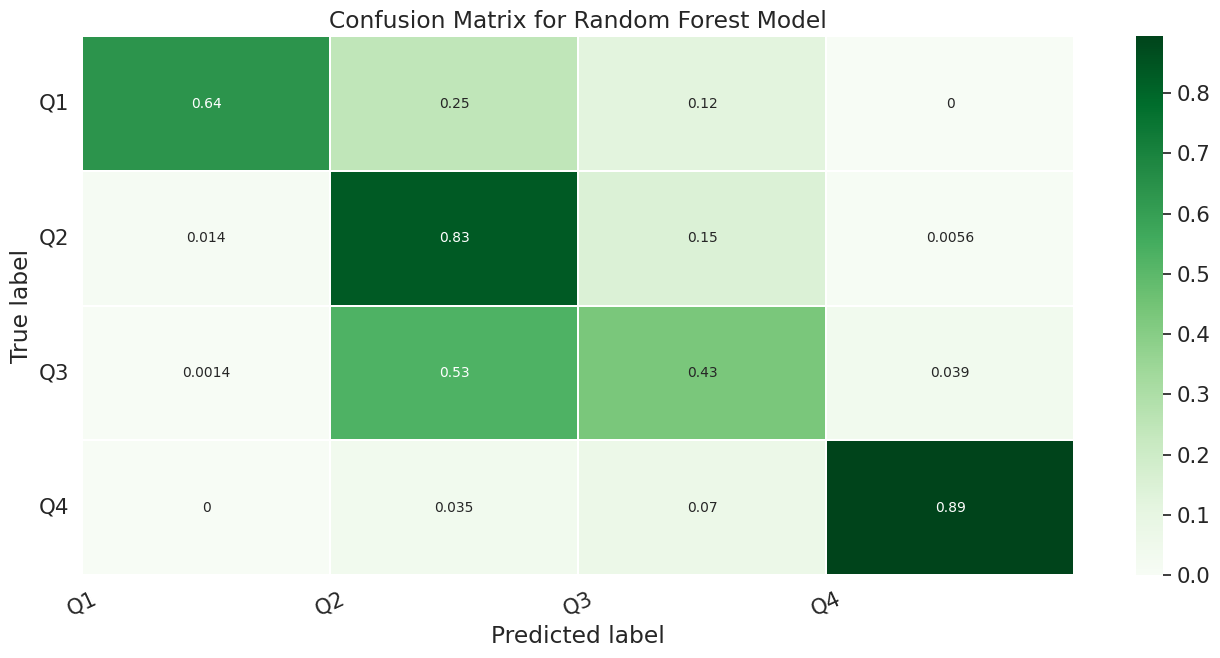

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Q1', 'Q2', 'Q3', 'Q4']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

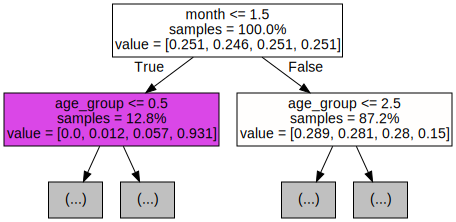

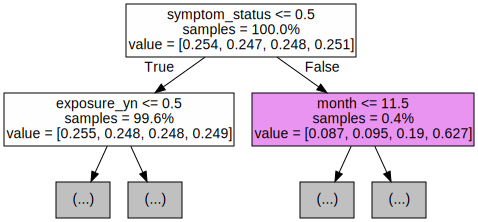

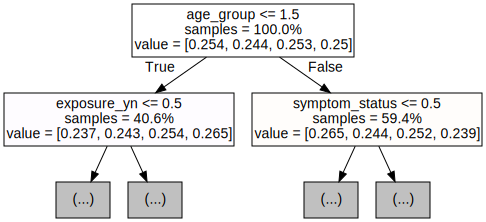

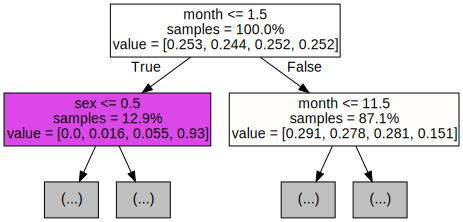

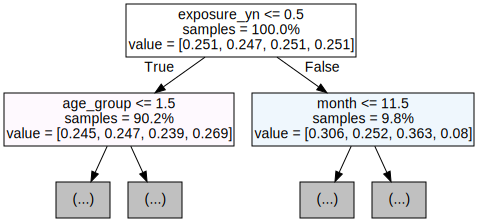

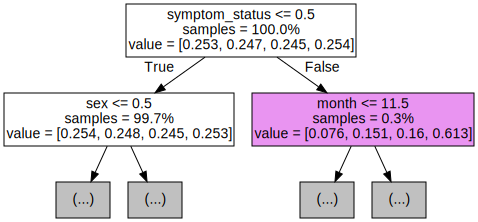

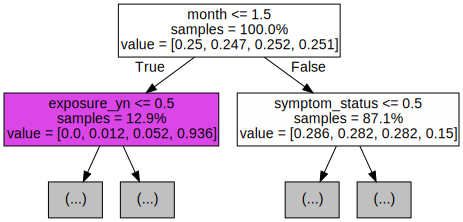

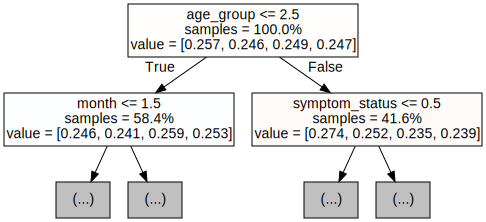

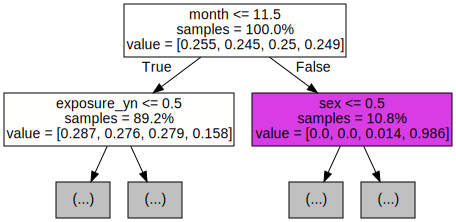

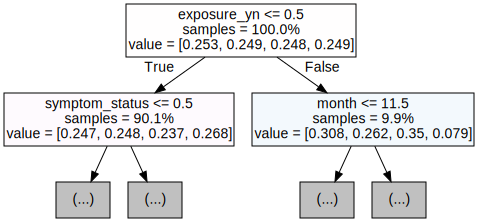

In [ ]:
# Export the first three decision trees from the forest

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=1,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,10)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.plot.bar(0.1)

In [ ]:
df_merged

,county,month,age_group_0 - 17 years,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,sex_Female,sex_Male,exposure_yn_Unknown,exposure_yn_Yes,symptom_status_Asymptomatic,symptom_status_Symptomatic,symptom_status_Unknown,pop_density,p
0,1,1,0.256757,0.391892,0.209459,0.141892,0.554054,0.445946,1.000000,0.000000,0.0,1.0,0.0,316301.0,0.022498
1,1,2,0.219512,0.451220,0.195122,0.134146,0.536585,0.463415,1.000000,0.000000,0.0,1.0,0.0,316301.0,0.006788
2,1,3,0.109244,0.470588,0.243697,0.176471,0.529412,0.470588,0.823529,0.176471,0.0,1.0,0.0,316301.0,0.005580
3,1,4,0.160494,0.395062,0.246914,0.197531,0.530864,0.469136,0.839506,0.160494,0.0,1.0,0.0,316301.0,0.004790
4,1,5,0.125000,0.500000,0.200000,0.175000,0.525000,0.475000,0.837500,0.162500,0.0,1.0,0.0,316301.0,0.001597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,54,8,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,1.000000,0.000000,0.0,1.0,0.0,24634.0,0.002760
631,54,9,0.428571,0.428571,0.000000,0.142857,0.571429,0.428571,1.000000,0.000000,0.0,1.0,0.0,24634.0,0.007632
632,54,10,0.230769,0.461538,0.230769,0.076923,0.538462,0.461538,1.000000,0.000000,0.0,1.0,0.0,24634.0,0.011285
633,54,11,0.222222,0.333333,0.222222,0.222222,0.555556,0.444444,1.000000,0.000000,0.0,1.0,0.0,24634.0,0.010920


##PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from numpy.lib.function_base import median
import matplotlib.patches as mpatches

In [ ]:
df_1 = df_merged_rf

In [ ]:
df_merged["county"].unique()

In [ ]:
prevalence = df_1.iloc[:,-1]

In [ ]:
#Scaling and Normalizing:
scaled_df = df_1.drop(['p', 'county'], axis=1)
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns = scaled_df.columns)

In [ ]:
#perform PCA:
from sklearn.decomposition import PCA #importing PCA algorithm
pca = PCA(n_components=2).fit(scaled_df)

In [ ]:
#Total var:
total_var = pca.explained_variance_ratio_.sum()* 100
print("The total variance explained is: " + str(np.around(total_var,4)) +  "%.")

The total variance explained is: 37.094%.


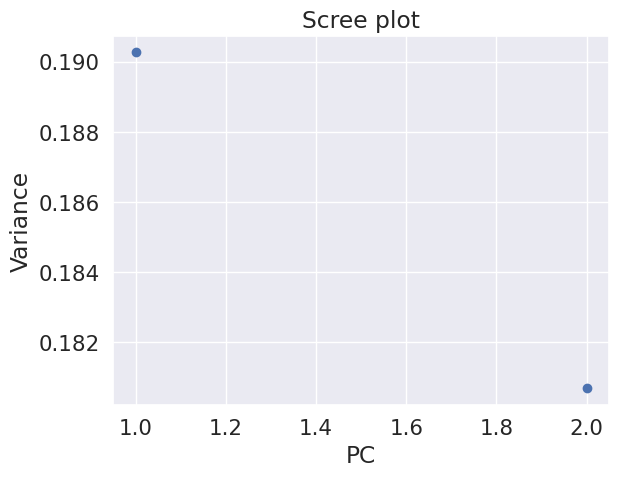

In [ ]:
'''
Scree plot: A scree plot shows how much variation each PC captures from the data.
The y axis is eigenvalues, which essentially stand for the amount of variation.
Use a scree plot to select the principal components to keep. An ideal curve
should be steep, then bends at an “elbow” — this is your cutting-off point —
and after that flattens out.
'''
plt.plot(np.arange(1,3), pca.explained_variance_ratio_,'o')
plt.title("Scree plot")
plt.xlabel('PC')
plt.ylabel('Variance')

plt.show()

#y-axis: variance (1,2,3,4)

In [ ]:
#Extract the two loading vectors (doing the analysis in 2-D as opposed to 4-D)
#Compute  z1i  and  z2i  from data using pca method transform: extract the two PCA loadings
phi1 = pca.components_[0]
phi2 = pca.components_[1]
z1 = pca.transform(scaled_df)[:,0]
z2 = pca.transform(scaled_df)[:,1]

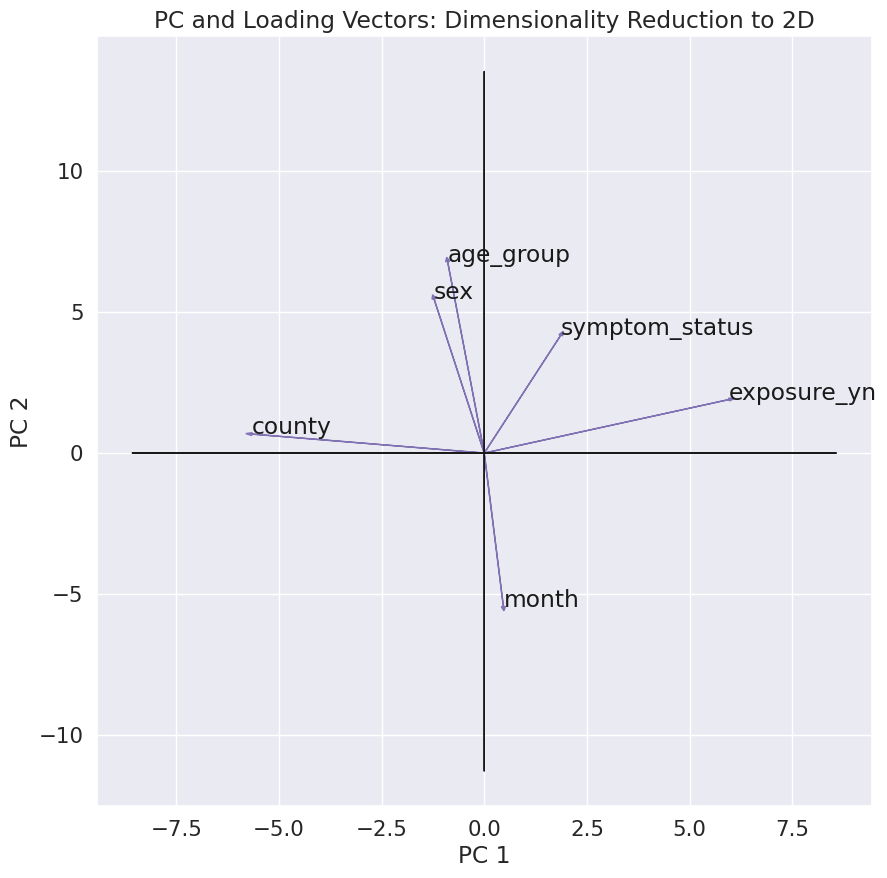

In [ ]:
'''
BiPlot and Loading Vectors
'''
#Plot  (z1i,z2i)  and draw arrows indicating direction of increasing factors of variables
plt.figure(figsize=(10,10))
for i in range(len(phi1)):
    plt.arrow(0, 0, phi1[i]*max(z1), phi2[i]*max(z2),
              color='m', width=0.005, head_width=0.10)
    plt.text(phi1[i]*max(z1), phi2[i]*max(z2),
             list(df_merged_rf.drop(['p'], axis=1).columns.values)[i], color='k')
plt.arrow(0, 0, 0, max(z2)*1.2, color='k', width=0.0005, head_width=0.0025)
plt.arrow(0, 0, max(z1)*1, 0, color='k', width=0.0005, head_width=0.0025)
plt.arrow(0, 0, 0, max(z2)*-1, color='k', width=0.0005, head_width=0.0025)
plt.arrow(0, 0, max(z1)*-1,0, color='k', width=0.0005, head_width=0.0025)


#Plot title:
plt.title("PC and Loading Vectors: Dimensionality Reduction to 2D")

#plot labels:
plt.xlabel('PC 1')
plt.ylabel('PC 2')

#show plot:
plt.show()

In [ ]:
'''Interpreting the biplot and loading vectors:
 - Reference: https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Principal-Component-Analysis/PCA-the-basics/Interpretation-and-visualization/index.html
 - Original Variables are show as vectors which start from (0,0) and extend to the
coordinates given by the loading vector.
 - The more parallel a vector is to a principal component, the more it contributes to
that principal component.
 - Month, Symptom_status, sex, exposure_yn contribute the most to PC2 (the y-axis)
 - From our plot, pop density and county contribute strongly to PC1 (the x-axis)
 - Some of the vectors are of a similar size, which means not all vectors are equally being represented by the two principal components
 - Right angles between vectors represent lack of correlation
'''